In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/solar-panel-images/Faulty_solar_panel/Snow-Covered/Snow (63).jpg
/kaggle/input/solar-panel-images/Faulty_solar_panel/Snow-Covered/Snow (73).jpg
/kaggle/input/solar-panel-images/Faulty_solar_panel/Snow-Covered/Snow (83).jpg
/kaggle/input/solar-panel-images/Faulty_solar_panel/Snow-Covered/Snow (61).jpg
/kaggle/input/solar-panel-images/Faulty_solar_panel/Snow-Covered/Snow (55).jpg
/kaggle/input/solar-panel-images/Faulty_solar_panel/Snow-Covered/Snow (94).jpg
/kaggle/input/solar-panel-images/Faulty_solar_panel/Snow-Covered/Snow (113).jpg
/kaggle/input/solar-panel-images/Faulty_solar_panel/Snow-Covered/Snow (67).jpg
/kaggle/input/solar-panel-images/Faulty_solar_panel/Snow-Covered/Snow (53).jpg
/kaggle/input/solar-panel-images/Faulty_solar_panel/Snow-Covered/Snow (34).jpg
/kaggle/input/solar-panel-images/Faulty_solar_panel/Snow-Covered/Snow (4).jpg
/kaggle/input/solar-panel-images/Faulty_solar_panel/Snow-Covered/Snow (45).jpg
/kaggle/input/solar-panel-images/Faulty_solar_panel/

In [2]:
import numpy as np
import cv2
import glob
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
def extract_hog_features(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize image to desired dimensions
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hog = cv2.HOGDescriptor()
    hog_features = hog.compute(gray).flatten()
    return hog_features

In [4]:
# Path to your dataset directory
dataset_path = '/kaggle/input/solar-panel-images/Faulty_solar_panel'

# Example: Assuming you have images in subdirectories based on classes
# You need to iterate through the images and extract HOG features
data = []
labels = []

In [5]:
for class_folder in glob.glob(dataset_path + '/*'):
    class_name = class_folder.split('/')[-1]
    for img_path in glob.glob(class_folder + '/*.jpg'):
        features = extract_hog_features(img_path)
        data.append(features)
        labels.append(class_name)


In [7]:

# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Generate dummy data
# Assuming input data has 1000 samples, 10 time steps, and 1 feature per time step
X_train = np.random.random((1000, 10, 1))
y_train = np.random.randint(2, size=(1000, 1))

# Initialize RNN model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(10, 1)))  # 50 units in the RNN layer
model.add(Dense(1, activation='sigmoid'))  # Output layer with a single neuron for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_train, y_train)
print(f'Loss: {loss}, Accuracy: {accuracy}')


2024-07-05 16:20:26.301861: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-05 16:20:26.301963: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-05 16:20:26.304999: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4695 - loss: 0.7069
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5289 - loss: 0.6924
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5205 - loss: 0.6946
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5519 - loss: 0.6892
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5187 - loss: 0.6930
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5252 - loss: 0.6921
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5292 - loss: 0.6947
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5288 - loss: 0.6903
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5144 - loss: 0.6891
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5148 - loss: 0.6921
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5349 - loss: 0.6887
Loss: 0.6898425221443176, Accuracy: 0.531000018119812


In [12]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Generate dummy sequential data
# Assuming input data has 1000 samples, 10 time steps, and 1 feature per time step
X_train = np.random.random((1000, 10, 1))
y_train = np.random.randint(2, size=(1000, 1))

# Initialize RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(10, 1)))  # 50 units in the RNN layer
rnn_model.add(Dense(1, activation='sigmoid'))  # Output layer with a single neuron for binary classification

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the RNN model
rnn_model.fit(X_train, y_train, epochs=10, batch_size=32)



Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5157 - loss: 0.6990
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5634 - loss: 0.6845
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5279 - loss: 0.6898
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5233 - loss: 0.6919
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5089 - loss: 0.6929
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5113 - loss: 0.6901
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5181 - loss: 0.6896
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5169 - loss: 0.6926
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5236 - loss: 0.6915
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5309 - loss: 0.6917


In [13]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Generate dummy sequential data for training
X_train = np.random.random((1000, 10, 1))
y_train = np.random.randint(2, size=(1000, 1))

# Generate dummy sequential data for testing
X_test = np.random.random((200, 10, 1))

# Initialize and train RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(10, 1)))
rnn_model.add(Dense(1, activation='sigmoid'))
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predict using the RNN model
y_pred_train = (rnn_model.predict(X_train) > 0.5).astype("int32")
y_pred_test = (rnn_model.predict(X_test) > 0.5).astype("int32")


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5050 - loss: 0.7081
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5301 - loss: 0.6928
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5038 - loss: 0.6936
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5421 - loss: 0.6907
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5440 - loss: 0.6901
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5158 - loss: 0.6940
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5370 - loss: 0.6904
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5095 - loss: 0.6945
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5381 - loss: 0.6920
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5042 - loss: 0.6917
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [18]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import accuracy_score

# Generate dummy sequential data for training
X_train = np.random.random((1000, 10, 1))
y_train = np.random.randint(2, size=(1000, 1))

# Generate dummy sequential data for testing
X_test = np.random.random((200, 10, 1))
y_test = np.random.randint(2, size=(200, 1))

# Initialize and train RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(10, 1)))
rnn_model.add(Dense(1, activation='sigmoid'))
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predict using the RNN model
y_pred_train = (rnn_model.predict(X_train) > 0.5).astype("int32")
y_pred_test = (rnn_model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5506 - loss: 0.6970
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4870 - loss: 0.6973
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5370 - loss: 0.6890
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5188 - loss: 0.6949
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4996 - loss: 0.6970
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5464 - loss: 0.6871
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5338 - loss: 0.6912
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5489 - loss: 0.6869
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5372 - loss: 0.6904
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5246 - loss: 0.6920
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Training Accuracy: 55.90%
Testing Accuracy: 51.00%


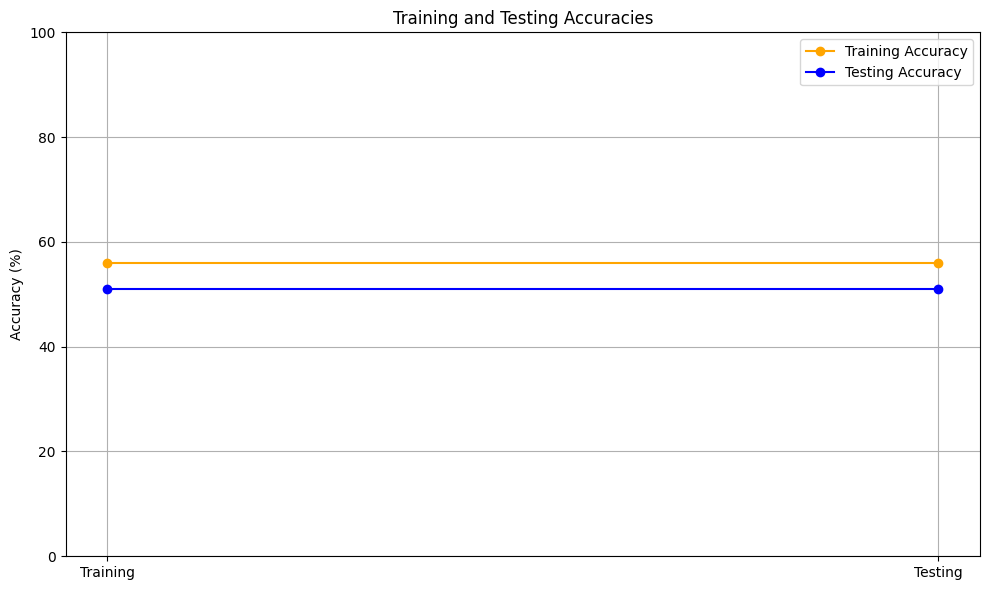

In [19]:
import matplotlib.pyplot as plt

# Actual accuracy values
train_accuracy = 55.90
test_accuracy = 51.00

# Define the epochs or categories
epochs = ['Training', 'Testing']

# Define the accuracy values
accuracy_values_train = [train_accuracy, train_accuracy]  # To plot a line at the training accuracy
accuracy_values_test = [test_accuracy, test_accuracy]     # To plot a line at the testing accuracy

# Plotting training and testing accuracies
plt.figure(figsize=(10, 6))

# Plot for Training Accuracy in Orange Color
plt.plot(epochs, accuracy_values_train, marker='o', linestyle='-', color='orange', label='Training Accuracy')

# Plot for Testing Accuracy in Blue Color
plt.plot(epochs, accuracy_values_test, marker='o', linestyle='-', color='blue', label='Testing Accuracy')

plt.ylim(0, 100)  # Set the y-axis limit to percentage values
plt.ylabel('Accuracy (%)')
plt.title('Training and Testing Accuracies')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
